# Seiya Iwama

## Research question/interests

Identify what indicators can be used to clearly visualize inequality.

In other words, identify which indicators are better indicators of inequality or which indicators are highly correlated (to the Corruption Perception Index).

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns


In [4]:
import datapackage
import pandas as pd

data_url = 'https://datahub.io/core/corruption-perceptions-index/datapackage.json'

package = datapackage.Package(data_url)

resources = package.resources
for resource in resources:
    if resource.tabular:
        data = pd.read_csv(resource.descriptor['path'])
        print (data)

    Jurisdiction 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009  \
0    Afghanistan    -    -    -    -    -    -    -  2.5    -  1.8  1.5  1.3   
1        Albania    -  2.3    -    -  2.5  2.5  2.5  2.4  2.6  2.9  3.4  3.2   
2        Algeria    -    -    -    -    -  2.6  2.7  2.8  3.1    3  3.2  2.8   
3         Angola    -    -  1.7    -  1.7  1.8    2    2  2.2  2.2  1.9  1.9   
4      Argentina    3    3  3.5  3.5  2.8  2.5  2.5  2.8  2.9  2.9  2.9  2.9   
..           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
222     Viet Nam    -    -    -    -    -    -    -    -  2.6  2.6  2.7    -   
223        Yemen    -    -    -    -    -  2.6  2.4  2.7  2.6  2.5  2.3  2.1   
224   Yugoslavia    3    2  1.3    -    -    -    -    -    -    -    -    -   
225       Zambia  3.5  3.5  3.4  2.6  2.6  2.5  2.6  2.6  2.6  2.6  2.8    3   
226     Zimbabwe  4.2  4.1    3  2.9  2.7  2.3  2.3  2.6  2.4  2.1  1.8  2.2   

    2010  2011 2012 2013 2014 2015  
0 

In [7]:
WID = pd.read_csv('../data/raw/WID_countries.csv', sep = ";")
WID

,alpha2,titlename,shortname,region,region2
0,AM,Armenia,Armenia,Asia,Western Asia
1,AN,the Netherlands Antilles,Netherlands Antilles,Americas,Caribbean
2,AO,Angola,Angola,Africa,Middle Africa
3,AR,Argentina,Argentina,Americas,South America
4,AS,American Samoa,American Samoa,Oceania,Oceania (excl. Australia and New Zealand)
...,...,...,...,...,...
340,DE-PR,Prussia,Prussia,NaN,NaN
341,DE-SN,Saxony,Saxony,NaN,NaN
342,DE-WU,Wurttemberg,Wurttemberg,NaN,NaN
343,QY-MER,NaN,NaN,NaN,NaN


In [8]:
WID.head()

,alpha2,titlename,shortname,region,region2
0,AM,Armenia,Armenia,Asia,Western Asia
1,AN,the Netherlands Antilles,Netherlands Antilles,Americas,Caribbean
2,AO,Angola,Angola,Africa,Middle Africa
3,AR,Argentina,Argentina,Americas,South America
4,AS,American Samoa,American Samoa,Oceania,Oceania (excl. Australia and New Zealand)


In [9]:
WID.tail()

,alpha2,titlename,shortname,region,region2
340,DE-PR,Prussia,Prussia,NaN,NaN
341,DE-SN,Saxony,Saxony,NaN,NaN
342,DE-WU,Wurttemberg,Wurttemberg,NaN,NaN
343,QY-MER,NaN,NaN,NaN,NaN
344,KV,NaN,NaN,NaN,NaN


In [10]:
WID.head(8)

,alpha2,titlename,shortname,region,region2
0,AM,Armenia,Armenia,Asia,Western Asia
1,AN,the Netherlands Antilles,Netherlands Antilles,Americas,Caribbean
2,AO,Angola,Angola,Africa,Middle Africa
3,AR,Argentina,Argentina,Americas,South America
4,AS,American Samoa,American Samoa,Oceania,Oceania (excl. Australia and New Zealand)
5,AT,Austria,Austria,Europe,Western Europe
6,AU,Australia,Australia,Oceania,Australia and New Zealand
7,AW,Aruba,Aruba,Americas,Caribbean


By using head() function, it is easy to find the columns.

In [12]:
# I want to take all african countries "xpi_xxx.csv" into one csv file.
# use "WID_countries.csv" and "AfricanDevelopment.csv"

WID = (pd.read_csv('../data/raw/WID_countries.csv', sep = ";"))

African = (pd.read_csv('../data/raw/AfricanDevelopment.csv'))

# Only take out African countries.
WID_African = WID.query('region == "Africa"') # df.query('state == "CA"')

# Change the column name of WID_African (from "titlename" to "country")
WID_African = WID_African.rename(columns={'titlename':'country'})

pd.merge(African, WID_African, on='country', how='outer')

merged_af = pd.merge(African, WID_African, on='country', how='outer')

# sort by "alpha2"
merged_af.sort_values(by='alpha2') 

# Remove lines where "alpha2" is nan
merged_af_dropNan = merged_af.dropna(how='all').dropna()
merged_af_dropNan.sort_values(by='alpha2') 

,country,humanDevelopmentIndex,pop2021,alpha2,shortname,region,region2
18,Angola,0.574,33933.610,AO,Angola,Africa,Middle Africa
41,Burkina Faso,0.434,21497.096,BF,Burkina Faso,Africa,Western Africa
44,Burundi,0.423,12255.433,BI,Burundi,Africa,Eastern Africa
28,Benin,0.520,12451.040,BJ,Benin,Africa,Western Africa
4,Botswana,0.728,2397.241,BW,Botswana,Africa,Southern Africa
19,Cameroon,0.563,27224.265,CM,Cameroon,Africa,Middle Africa
2,Algeria,0.759,44616.624,DZ,Algeria,Africa,Northern Africa
8,Egypt,0.700,104258.327,EG,Egypt,Africa,Northern Africa
42,Eritrea,0.434,3601.467,ER,Eritrea,Africa,Eastern Africa
35,Ethiopia,0.470,117876.227,ET,Ethiopia,Africa,Eastern Africa


In [14]:
merged_af_dropNan

,country,humanDevelopmentIndex,pop2021,alpha2,shortname,region,region2
0,Seychelles,0.801,98.908,SC,Seychelles,Africa,Eastern Africa
1,Mauritius,0.796,1273.433,MU,Mauritius,Africa,Eastern Africa
2,Algeria,0.759,44616.624,DZ,Algeria,Africa,Northern Africa
3,Tunisia,0.739,11935.766,TN,Tunisia,Africa,Northern Africa
4,Botswana,0.728,2397.241,BW,Botswana,Africa,Southern Africa
5,Libya,0.708,6958.532,LY,Libya,Africa,Northern Africa
6,South Africa,0.705,60041.994,ZA,South Africa,Africa,Southern Africa
7,Gabon,0.702,2278.825,GA,Gabon,Africa,Middle Africa
8,Egypt,0.700,104258.327,EG,Egypt,Africa,Northern Africa
9,Morocco,0.676,37344.795,MA,Morocco,Africa,Northern Africa


In [29]:
merged_af_dropNan["region2"]

0      Eastern Africa
1      Eastern Africa
2     Northern Africa
3     Northern Africa
4     Southern Africa
5     Northern Africa
6     Southern Africa
7       Middle Africa
8     Northern Africa
9     Northern Africa
11      Middle Africa
14     Western Africa
15     Eastern Africa
16      Middle Africa
17     Eastern Africa
18      Middle Africa
19      Middle Africa
20     Eastern Africa
21     Eastern Africa
22     Eastern Africa
23     Western Africa
24     Eastern Africa
25     Eastern Africa
26     Western Africa
27     Eastern Africa
28     Western Africa
29    Southern Africa
31     Western Africa
32     Western Africa
33    Northern Africa
34     Eastern Africa
35     Eastern Africa
36     Western Africa
37     Western Africa
38     Western Africa
39     Western Africa
40     Western Africa
41     Western Africa
42     Eastern Africa
43     Western Africa
44     Eastern Africa
45    Northern Africa
46      Middle Africa
47     Western Africa
Name: region2, dtype: object

In [31]:
merged_af_dropNan.groupby('region2').count()

,country,humanDevelopmentIndex,pop2021,alpha2,shortname,region
region2,,,,,,
Eastern Africa,14,14,14,14,14,14
Middle Africa,6,6,6,6,6,6
Northern Africa,7,7,7,7,7,7
Southern Africa,3,3,3,3,3,3
Western Africa,14,14,14,14,14,14


In [35]:
grouped_by_area = merged_af_dropNan.groupby('region2')

In [36]:
grouped_by_area.mean()

,humanDevelopmentIndex,pop2021
region2,,
Eastern Africa,0.556643,28211.852286
Middle Africa,0.572833,13670.824833
Northern Africa,0.643143,37343.539286
Southern Africa,0.650333,21532.771333
Western Africa,0.481214,27488.458857


In [37]:
grouped_by_area.max()

,country,humanDevelopmentIndex,pop2021,alpha2,shortname,region
region2,,,,,,
Eastern Africa,Zimbabwe,0.801,117876.227,ZW,Zimbabwe,Africa
Middle Africa,Sao Tome and Principe,0.702,33933.610,TD,Sao Tome and Principe,Africa
Northern Africa,Tunisia,0.759,104258.327,TN,Tunisia,Africa
Southern Africa,South Africa,0.728,60041.994,ZA,South Africa,Africa
Western Africa,Togo,0.596,211400.708,TG,Togo,Africa


In [38]:
grouped_by_area.min()

,country,humanDevelopmentIndex,pop2021,alpha2,shortname,region
region2,,,,,,
Eastern Africa,Burundi,0.423,98.908,BI,Burundi,Africa
Middle Africa,Angola,0.401,223.368,AO,Angola,Africa
Northern Africa,Algeria,0.413,6958.532,DZ,Algeria,Africa
Southern Africa,Botswana,0.518,2159.079,BW,Botswana,Africa
Western Africa,Benin,0.377,2015.494,BF,Benin,Africa


region2
Eastern Africa     AxesSubplot(0.125,0.125;0.775x0.755)
Middle Africa      AxesSubplot(0.125,0.125;0.775x0.755)
Northern Africa    AxesSubplot(0.125,0.125;0.775x0.755)
Southern Africa    AxesSubplot(0.125,0.125;0.775x0.755)
Western Africa     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

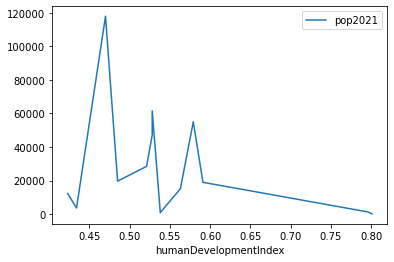

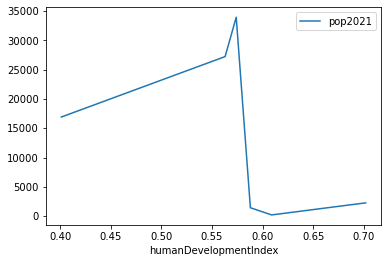

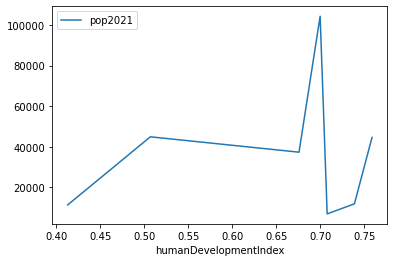

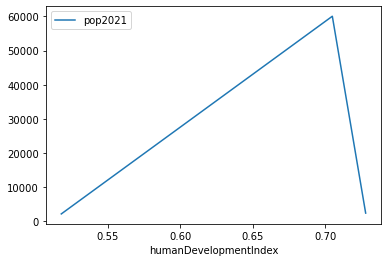

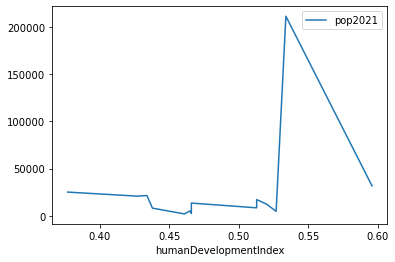

In [42]:
grouped_by_area.plot(x='humanDevelopmentIndex', y='pop2021')

In [13]:
# for index, row in df.iterrows():
import os

X = merged_af_dropNan.loc[1, 'country'] #    BB = merged_af_dropNan.loc[i, 'country']
x = X.lower()
path = (f'../data/raw/cpi_{x}.csv')
is_file = os.path.isfile(path)

if is_file:
    XXX = (pd.read_csv(f'../data/raw/cpi_{x}.csv', sep = ";"))
    XXX['country']=f"{x}"
    merged_af_dropNan_merged_with_CPI = pd.merge(merged_af_dropNan,XXX)
else:
    pass
XXX

,"Country,Mauritius,,,,,,,,,,,",country
0,"Variable,CPI,p90p100,p50p90,p0p50,p99p100,Nat ...",mauritius
1,"1998,5,0.4578,0.3901,0.152,0.1374,12783.4058,1...",mauritius
2,"1999,4.9,0.4578,0.3901,0.152,0.1374,13690.6223...",mauritius
3,"2000,4.7,0.4578,0.3901,0.152,0.1374,14002.9229...",mauritius
4,"2001,4.6,0.4578,0.3901,0.152,0.1374,14514.1506...",mauritius
5,"2002,4.5,0.4578,0.3901,0.152,0.1374,15420.4451...",mauritius
6,"2003,4.4,0.4578,0.3901,0.152,0.1374,16528.3231...",mauritius
7,"2004,4.2,0.4578,0.3901,0.152,0.1374,17623.773,...",mauritius
8,"2005,4.2,0.4578,0.3901,0.152,0.1374,18699.1575...",mauritius
9,"2006,5.2,0.4578,0.3901,0.152,0.1374,20726.5582...",mauritius


In [24]:
merged_af_dropNan.describe()

,humanDevelopmentIndex,pop2021
count,44.000000,44.000000
mean,0.555000,26996.190773
std,0.112621,38406.161702
min,0.377000,98.908000
25%,0.466000,4481.706000
50%,0.528000,14294.707500
75%,0.599250,32282.499250
max,0.801000,211400.708000


In [22]:
merged_af_dropNan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 47
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                44 non-null     object 
 1   humanDevelopmentIndex  44 non-null     float64
 2   pop2021                44 non-null     float64
 3   alpha2                 44 non-null     object 
 4   shortname              44 non-null     object 
 5   region                 44 non-null     object 
 6   region2                44 non-null     object 
dtypes: float64(2), object(5)
memory usage: 3.8+ KB


In [23]:
x = len(merged_af_dropNan.country.unique())
print(f"Number of Countries: {x}")

Number of Countries: 44


array([[<AxesSubplot:title={'center':'humanDevelopmentIndex'}>,
        <AxesSubplot:title={'center':'pop2021'}>]], dtype=object)

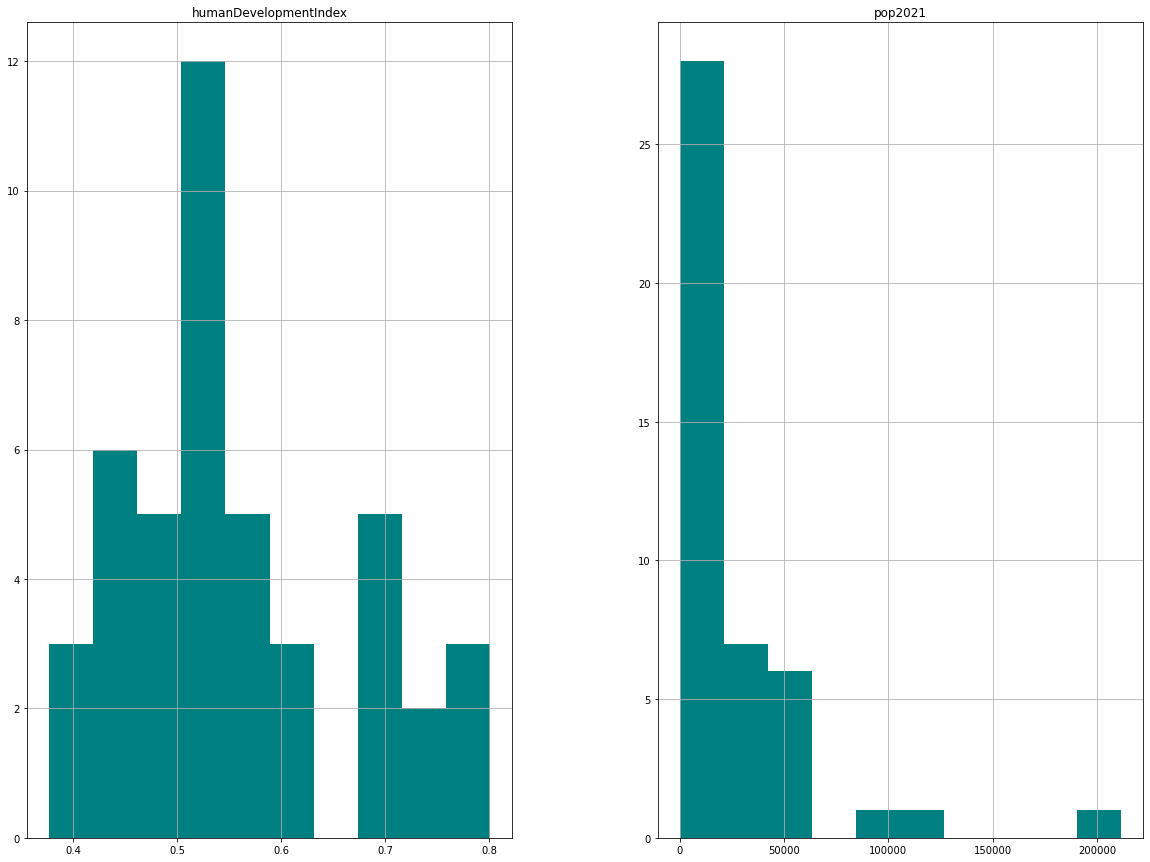

In [26]:
merged_af_dropNan.hist(bins=10, figsize=(20,15), color = 'teal')

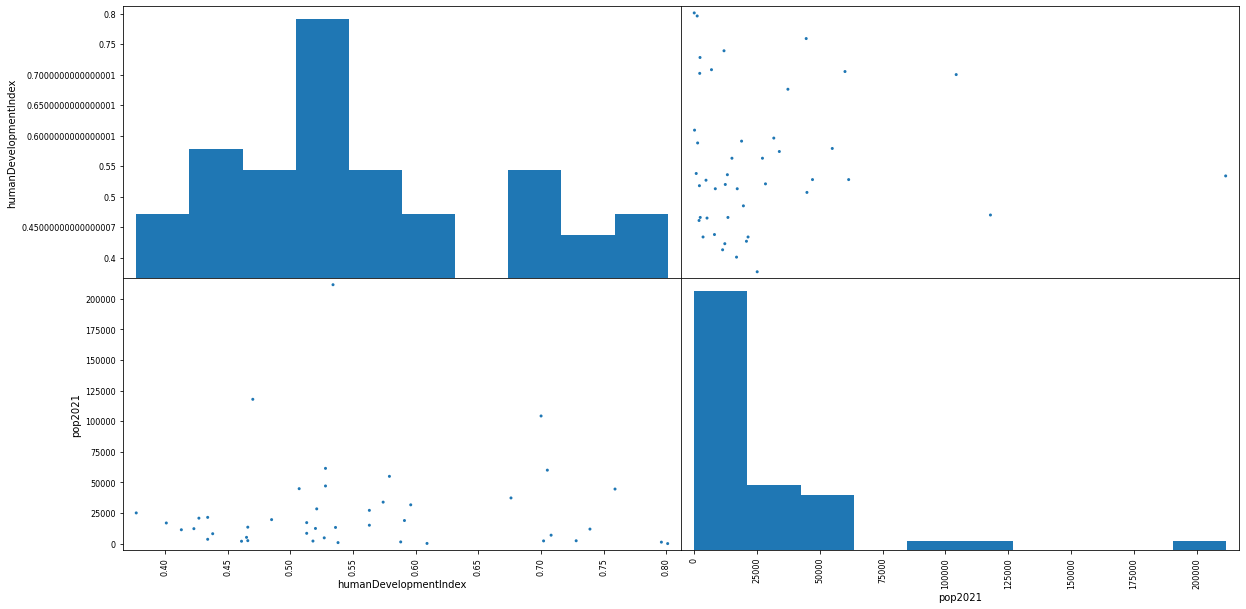

In [28]:
from pandas.plotting import scatter_matrix
x = scatter_matrix(merged_af_dropNan, alpha=1, figsize=(20, 10), diagonal='hist')